# Regression

 ## Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pandas as pd
%matplotlib inline

### Load the dataset

In [3]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [5]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [6]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print ('Categorical columns :', cat_col)

# Numerical colunns
num_col  = [col for col in df.columns if df[col].dtype != 'object']
print ('Numerical columns :', num_col)

Categorical columns : ['Area', 'Address']
Numerical columns : ['Room', 'Parking', 'Warehouse', 'Elevator', 'Price', 'Price(USD)']


In [7]:
df[cat_col].nunique()

Area       243
Address    192
dtype: int64

In [8]:
df['Area'].unique()[:50]

array(['63', '60', '79', '95', '123', '70', '87', '59', '54', '71', '68',
       '64', '136', '155', '140', '42', '93', '65', '99', '105', '160',
       '77', '110', '100', '90', '49', '96', '67', '62', '55', '129',
       '109', '58', '150', '130', '88', '51', '113', '98', '75', '61',
       '72', '122', '215', '101', '53', '74', '114', '151', '300'],
      dtype=object)

In [9]:
df1 = df.drop(columns=['Address'])

df1.shape

(3479, 7)

In [10]:
round((df.isnull().sum()/df.shape[0])*100, 2)

Area          0.00
Room          0.00
Parking       0.00
Warehouse     0.00
Elevator      0.00
Address       0.66
Price         0.00
Price(USD)    0.00
dtype: float64

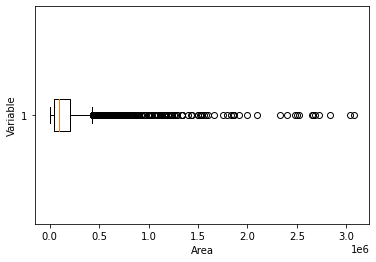

In [16]:
plt.boxplot(df1['Price(USD)'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Area')
plt.show()

In [12]:
mean = df1['Room'].mean()
std = df1['Room'].std()

lower_bound = mean - std*2
upper_bound = mean + std*2

print ('Lower Bound :', lower_bound)
print ('Upper Bound :', upper_bound)

df4 = df1[(df1['Room'] >= lower_bound) & (df1['Room'] <= upper_bound)]

Lower Bound : 0.5633573607830669
Upper Bound : 3.596458678308626


In [13]:
mean = df1['Price'].mean()
std = df1['Price'].std()

lower_bound = mean - std*2
upper_bound = mean + std*2

print ('Lower Bound :', lower_bound)
print ('Upper Bound :', upper_bound)

df4 = df1[(df1['Price'] >= lower_bound) & (df1['Price'] <= upper_bound)]

Lower Bound : -10840846338.091232
Upper Bound : 21558891759.241566


In [14]:
X = df1[['Area', 'Room', 'Parking', 'Elevator', 'Price', 'Price(USD)']]

In [15]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()


C:\Users\Tolu\AppData\Local\Temp\ipykernel_7068\1233491986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Area,Room,Parking,Elevator,Price,Price(USD)
0,63,0.2,1.0,1.0,0.019983,0.019983
1,60,0.2,1.0,1.0,0.019983,0.019983
2,79,0.4,1.0,1.0,0.005914,0.005914
3,95,0.4,1.0,1.0,0.009729,0.009729
4,123,0.4,1.0,1.0,0.075722,0.075722
